<h2 align='center>Algerian Forest Fires Dataset</h2>
           
### Life cycle of Machine learning Project

Understanding the Problem Statement
Data Collection
Exploratory data analysis
Data Cleaning
Data Pre-Processing
Model Training
Choose best model
1. Problem Statement
Need to make a linear regression model where output feature will be Temperature
Linear Regression :
In Linear Regression our main aim is to findout the best fit line so that our cost function will get reduced.
Techniques in Linear Regression
  - Ridge Regression (To reduce over-fitting)
  - Lasso Regression (To reduce the features)
  - Elastic net Regression (Combination of Ridge and Lasso, improves limitation of lasso and perform better 
    than either of the model)

<h1 align='center'>Algerian Forest Fires Dataset</h1>


## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


### 1. Problem Statement:

- **Create a linear regression model where output feature will be `Temperature`**


**Linear Regression :**
- In Linear Regression the main aim is to find out the **Best fit line with minimised error**.
- Techniques applied to achieve the objective are:
  - **Ridge Regression** (To reduce over-fitting)
  - **Lasso Regression** (For feature selection)
  - **Elastic net Regression** (It is a combination of both the models, it improves the limitations of Lasso and perform better than both models)

### Feature Information about the dataset:

**Date :** (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

**Temp :** temperature noon (temperature max) in Celsius degrees: 22 to 42

**RH :** Relative Humidity in %: 21 to 90 (Relative humidity (RH) is a measure of how much moisture is in the air)

**Ws :** Wind speed in km/h: 6 to 29 (wind speed)

**Rain:** total day in mm: 0 to 16.8 (Rain in a day in mm)

**FWI(Fire Weather Index) Components :** 0 to 31.1

**Fine Fuel Moisture Code (FFMC) index from the FWI system:** 28.6 to 92.5 (numerical rating of the moisture content of litter and cured fine fuels)

**Duff Moisture Code (DMC) index from the FWI system:** 1.1 to 65.9 (The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth)

**Drought Code (DC) index from the FWI system:** 7 to 220.4 (The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers)

**Initial Spread Index (ISI) index from the FWI system:** 0 to 18.5 (Initial Spread Index is a relative measure of how quickly a fire can be expected to spread)

**Buildup Index (BUI) index from the FWI system:** 1.1 to 68 (It is a numeric rating of the total amount of fuel available for combustion)

**Fire Weather Index (FWI) Index:** 0 to 31.1 (The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.)

**Classes:** two classes, namely as fire and as not fire (Result)

**Region :** There are two regions in the dataset Bejaia Region represented by 1 and Sidi Bel-Abbes Region represented by 1

### 2. Data Collection:

#### 2.1 Import modules and data and create dataframe

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Creating a dataframe removing the 1st row

df = pd.read_csv("dataset/Algerian_forest_fires_dataset_UPDATE.csv", skiprows=1)

**Show top 5 records**

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Shape of the dataset**

In [4]:
df.shape

(246, 14)

**Observations:**
- There are 246 rows and 14 columns (features) in the dataset.

In [5]:
# Getting basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**Observations:**
- Here we can see all the columns are of object type though they have numeric values.

### 3. Data Cleaning:

In [6]:
# Name of the columns:

df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Observations:**
- There are sapces in some column names.

In [7]:
# Trimming the spaces using list comprehension

df.columns = [column.strip() for column in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

**Finding the Unique values in the column `'Classes'`**

In [8]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [9]:
# trimming spaces of values in 'Classes' column

df['Classes'] = df['Classes'].str.strip()

In [10]:
# Let's check it again

df['Classes'].unique()

array(['not fire', 'fire', nan, 'Classes'], dtype=object)

#### Removing unnecessary rows

In [11]:
# finding index of unnecessary rows 

df[df.Classes == 'Classes']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [12]:
df[df['Classes'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [13]:
# Removing the rows

df.drop([122, 123], axis=0, inplace=True)
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
130,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
131,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


#### Adding a new column named `Region`

In [14]:
# making regions 'Bejaia' as 1 and 'Sidi-Bel Abbes' as 0

df.loc[:122, 'Region'] = 'Bejaia'
df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'
df['Region'] = df['Region'].map({'Bejaia':1, 'Sidi-Bel Abbes':0})
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,1
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,0
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,0
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,0
130,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,0
131,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,0


#### Replacing the `'Classes'` column categorical values with numerical values

In [15]:
df['Classes'] = df['Classes'].map({'not fire':0, 'fire':1})
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,0.0,0
83,23,08,2012,36,53,16,0,89.5,37.6,161.5,10.4,47.5,22.3,1.0,1
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,0.0,1
132,09,06,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,0.0,0
75,15,08,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22,6.3,1.0,1
156,03,07,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,1.0,0
104,13,09,2012,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0,0.0,1
67,07,08,2012,32,69,16,0,86.5,15.5,48.6,5.5,17.2,8,1.0,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0.0,0
39,10,07,2012,33,69,13,0.7,66.6,6,9.3,1.1,5.8,0.5,0.0,1


#### Checking all the unique values in each columns

In [16]:
for column in df.columns:
    print(f"The unique values in column {column}:")
    print(df[column].unique())
    print("----------------------------------\n")

The unique values in column day:
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
----------------------------------

The unique values in column month:
['06' '07' '08' '09']
----------------------------------

The unique values in column year:
['2012']
----------------------------------

The unique values in column Temperature:
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
----------------------------------

The unique values in column RH:
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
----------------------------------

The unique values in column Ws:
['18' '13

**Observations:**
- There is a value `14.6 9` in column `DC` that we need to rectify.
- Also a value `fire` in the column `FWI`, that also needed to be rectified. We will transform this `fire` to `0`.

#### Handling the errors

In [17]:
df['DC'] = df['DC'].str.split(' ').str[0]
df['FWI'] = df['FWI'].str.replace('fire','0')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,1


#### Let's check the datatypes of the columns

In [18]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes        float64
Region           int64
dtype: object

**Observations:**
- Other than `Classes` and `Region` all other are object types, though they have numerical values.
- There are also some columns like `date`, `month`, `year` which we don't require here, so instead we create a new column as `Date`. Then we can drop them.

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,1


#### Converting the datatypes of the columns, creating new column and drop the unnecessary columns.

In [20]:
# Converting the data types
df = df.astype({'day':int, 'month':int, 'year':int, 'Temperature':float, 'RH':int, 'Ws':int, 'Rain':float, 
                'FFMC':float, 'DMC':float, 'DC':float, 'ISI':float, "BUI":float, 'FWI':float})

# checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    float64
 14  Region       244 non-null    int64  
dtypes: float64(9), int32(5), int64(1)
memory usage: 33.8 KB


In [21]:
# creating new column

df['Date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,1,6,2012,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,2,6,2012,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,3,6,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,4,6,2012,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,5,6,2012,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05


In [22]:
# dropping the unnecessary columns

df.drop(columns=['day', 'month', 'year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    float64       
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      243 non-null    float64       
 11  Region       244 non-null    int64         
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory usage: 32.9 KB


**Observations:**
- Now all the column data types are changed, and unnecessary columns are dropped.
- We have 9 (float64) kind, 2 (int32) kind, 1 (datetime64) kind and 1 (int64) kind data.

In [24]:
# seeing the dataframe

df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05


#### Checking null values and duplicated values

In [25]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
Date           0
dtype: int64

**Observations:**
- There is only 1 null value in the `Classes` column.

In [26]:
# let's see the row with the null value

df[df['Classes'].isna()]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
167,37.0,37,18,0.2,88.9,12.9,14.6,12.5,10.4,0.0,NaN,0,2012-07-14


**Observations:**
- As the index of the row is more than 122 so we can place it in the `Sidi-Bel Abbes` region and provide it with value `0`.

In [27]:
df['Classes'] = df['Classes'].fillna(0)

# Again check for null values
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

In [28]:
# Checking duplicates

df[df.duplicated()].sum()

Temperature    0.0
RH             0.0
Ws             0.0
Rain           0.0
FFMC           0.0
DMC            0.0
DC             0.0
ISI            0.0
BUI            0.0
FWI            0.0
Classes        0.0
Region         0.0
dtype: float64

**Observations:**
- Now there is no null values and also the dataframe has no duplicate values.

#### Let's save clean dataset for future use

In [29]:
try:
    df.to_csv("dataset/Algerian_forest_cleaned.csv")
except Exception as err:
    print("Error is: ", err)
else:
    print("Clean csv file created successfully.")

Clean csv file created successfully.


### 4. Exploratory data analysis


**Using the cleaned dataframe**

In [30]:
df = pd.read_csv("dataset/Algerian_forest_cleaned.csv", index_col=0)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05


#### 4.1 Basic Profile of the data

In [31]:
# Checking the details of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    float64
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    float64
 11  Region       244 non-null    int64  
 12  Date         244 non-null    object 
dtypes: float64(9), int64(3), object(1)
memory usage: 26.7+ KB


#### Differentiating numerical and categorical columns

In [32]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']


print(f"The number of Numerical features are: {len(numerical_features)}, and the column names are:\n{numerical_features}")
print(f"\nThe number of Categorical features are: {len(categorical_features)}, and the column names are:\n{categorical_features}")

The number of Numerical features are: 12, and the column names are:
['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

The number of Categorical features are: 1, and the column names are:
['Date']


**Observations:**

- In total there are 244 rows and 13 columns in the dataset.
- There are no null values in the dataset.
- Also we have 12 numerical columns and 1 categorical column.

#### 4.2 Statistical Analysis of the data

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
FWI,244.0,7.006557,7.438889,0.0,0.700,4.20,11.375,31.1


**Observations:**

- There are possible Outliers in columns `Rain`, `DMC`, `DC`, `ISI`, `BUI`, `FWI`.

#### 4.3 Graphical Analysis of the data

#### 4.3.1 Univariate Analysis

- The univariate analysis is used to understand the distribution of values for a single variable.

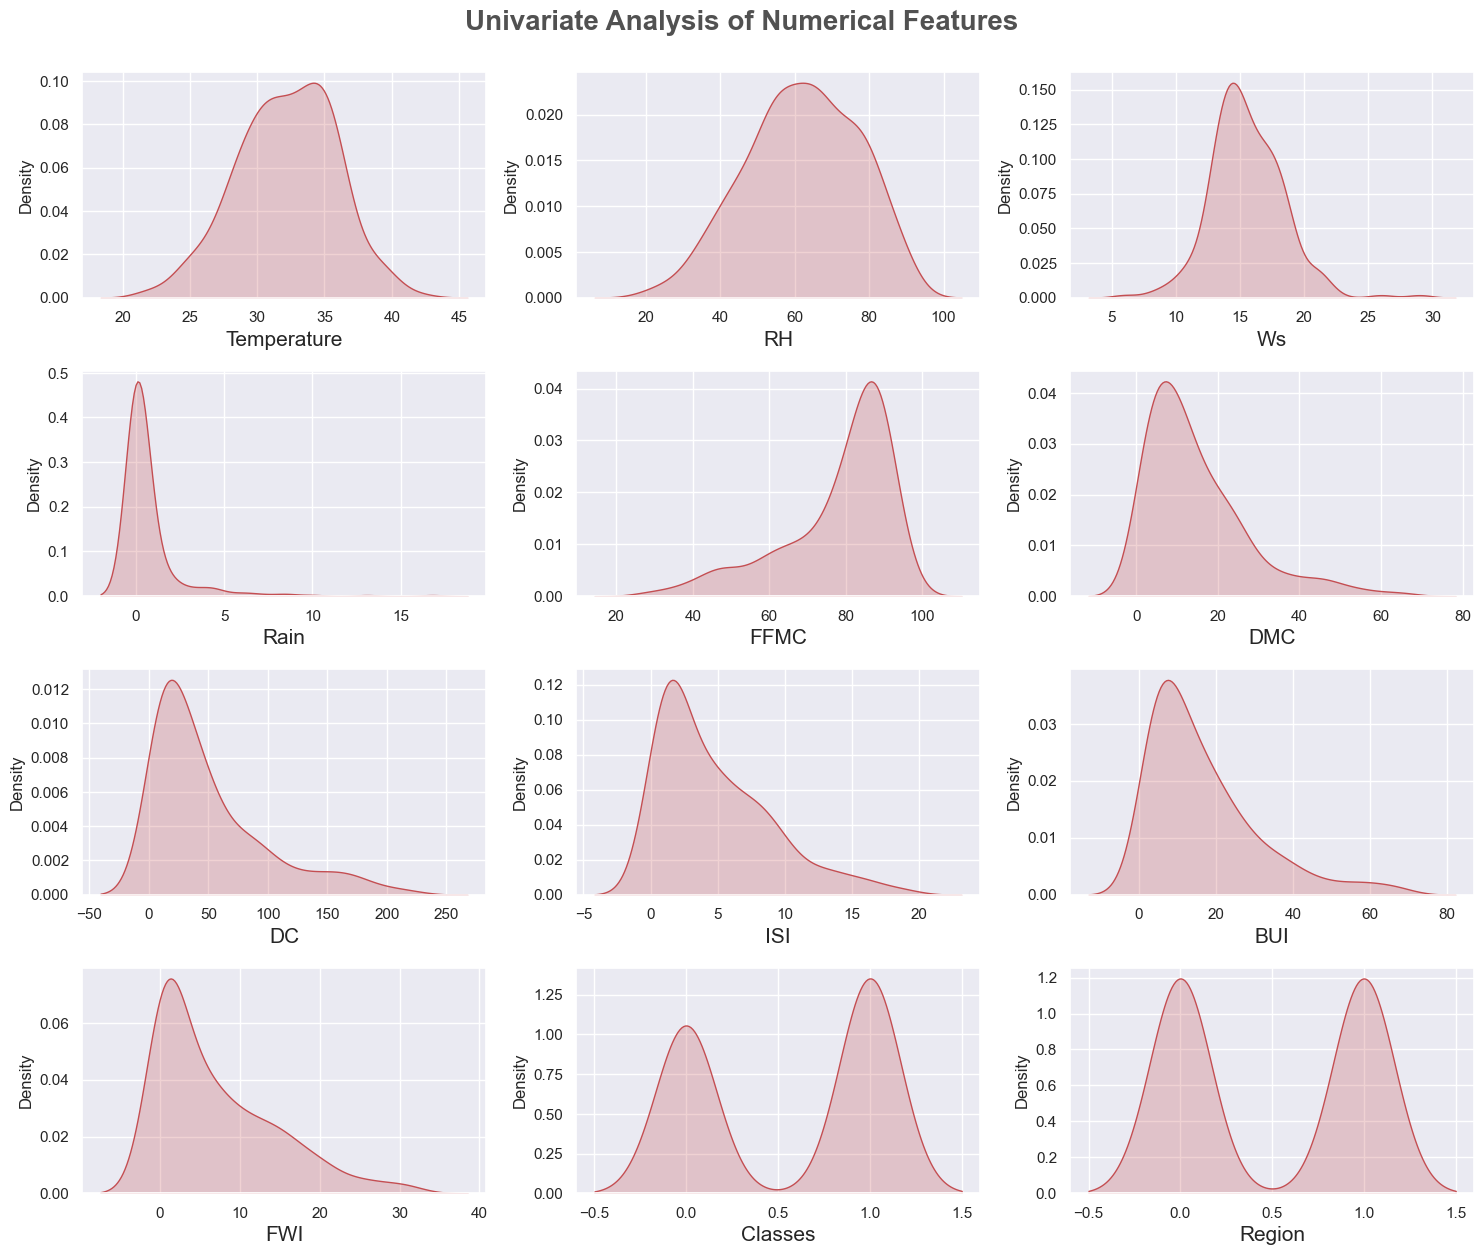

In [34]:
# For numerical features

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i], fontsize=15)
    plt.tight_layout()

**Observations:**

- We can see there is some skewness in the data.
- The `Rain`, `DMC`, `DC`, `ISI`, `BUI`, `FWI` are mainly right skewed.
- The `FFMC` is left skewed.
- The `Temperature`, `RH`, `WS` has almost normal distribution, although `WS` seems to have some right skewness and `RH` has some left skewness.
- The `Classes` and `Region` though have numeric value but they mainly represent categorical variables.
- There are also outliers in many columns.

<AxesSubplot:>

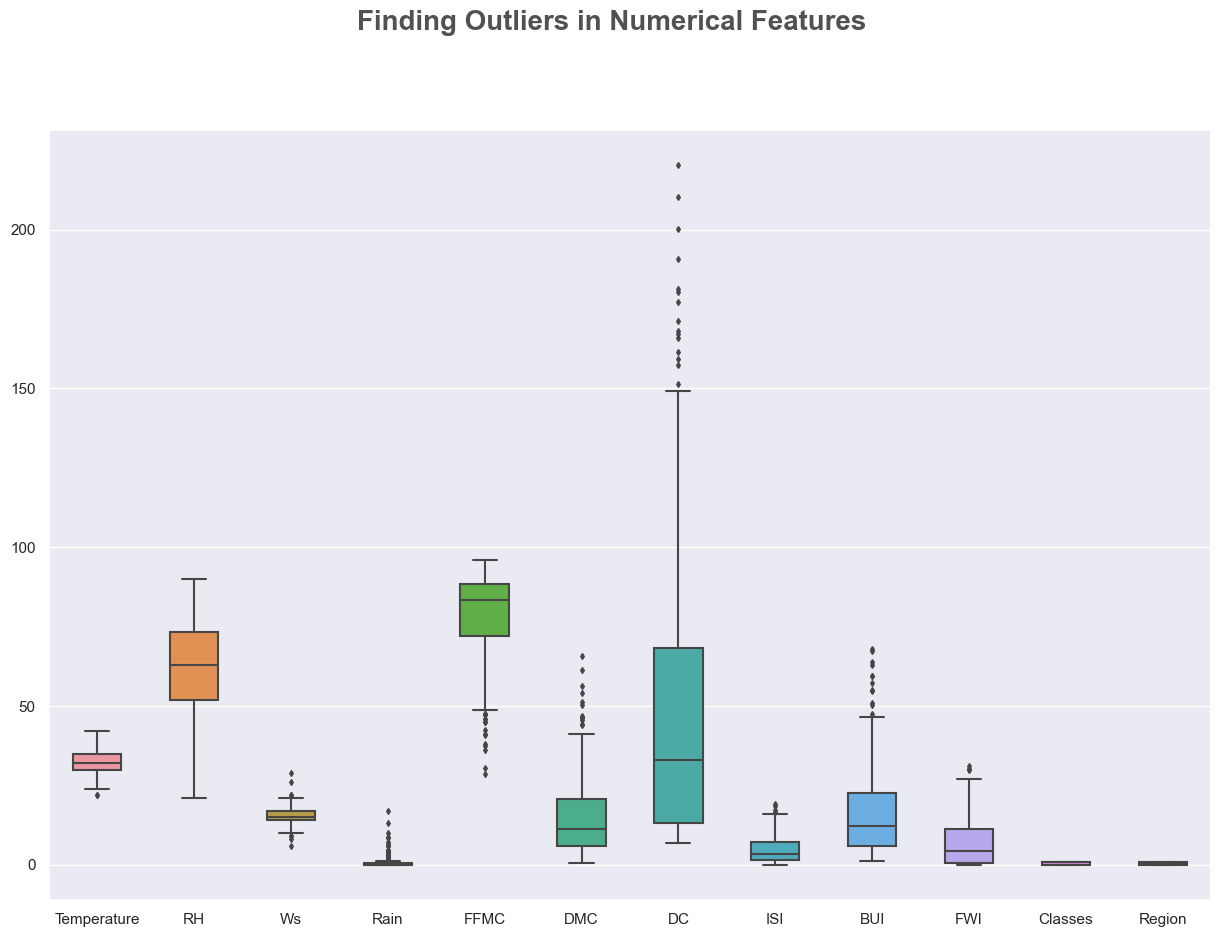

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('Finding Outliers in Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data=df, width= 0.5, ax=ax, fliersize=3)

**Observations:**
- There is an outlier in the lower side of the `Temperature` feature.
- There are outliers in both side of the `Ws` feature.
- There are outliers only in the upper side of the `Rain`, `DMC`, `DC`, `ISI`, `BUI`, `FWI` features.
- There are outliers only in the lower side of the `FFMC` features.
- It seems the most number of outliers are in `DC` feature.
- There is no outlier in the `RH` feature.

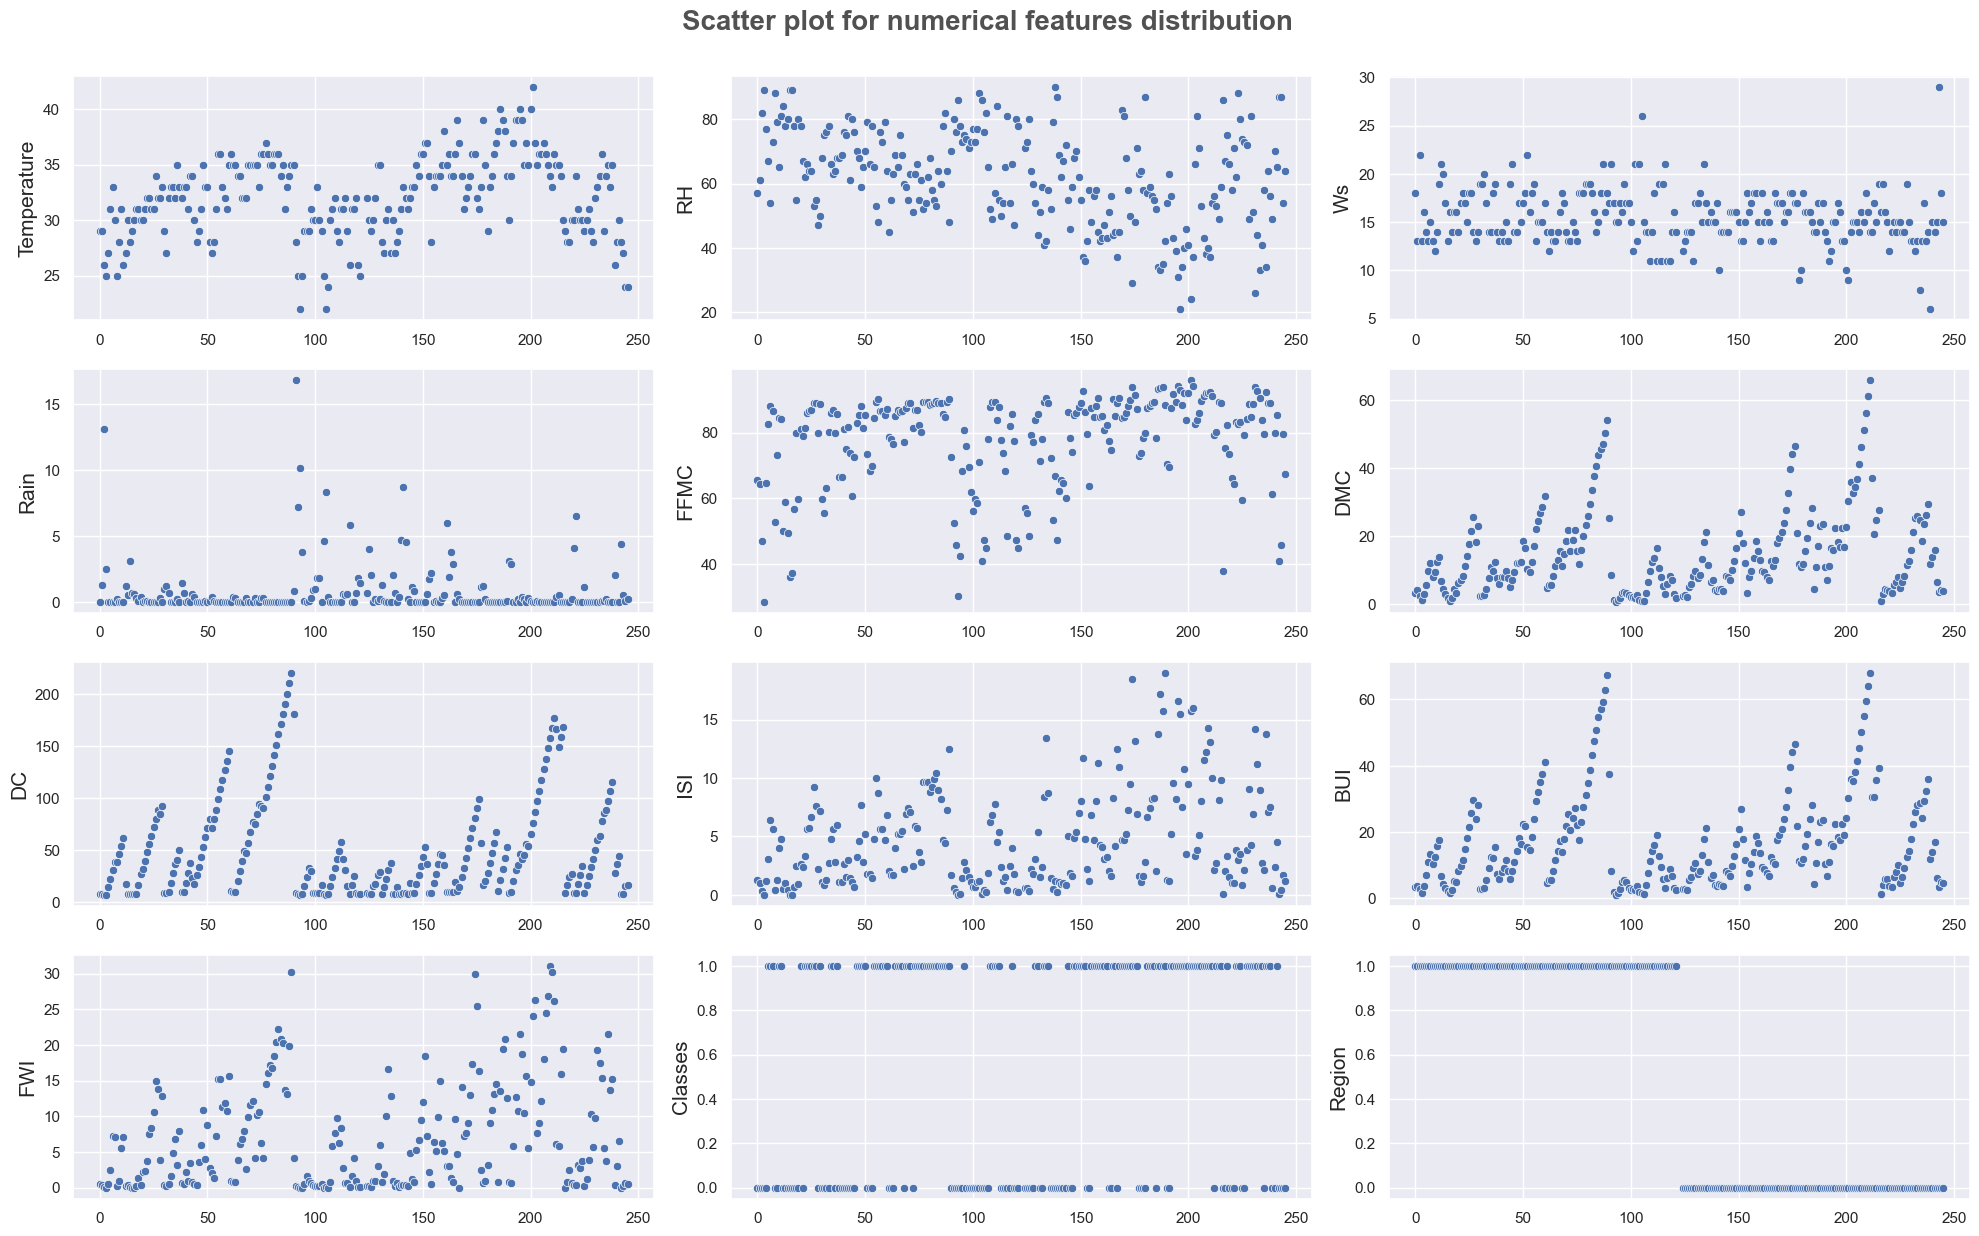

In [36]:
plt.figure(figsize=(20,15))
plt.suptitle('Scatter plot for numerical features distribution', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=df[numerical_features[i]], x=df.index, data=df)
    plt.ylabel(numerical_features[i], fontsize=15)
    plt.tight_layout()

Text(0.5, 0, 'Temperature')

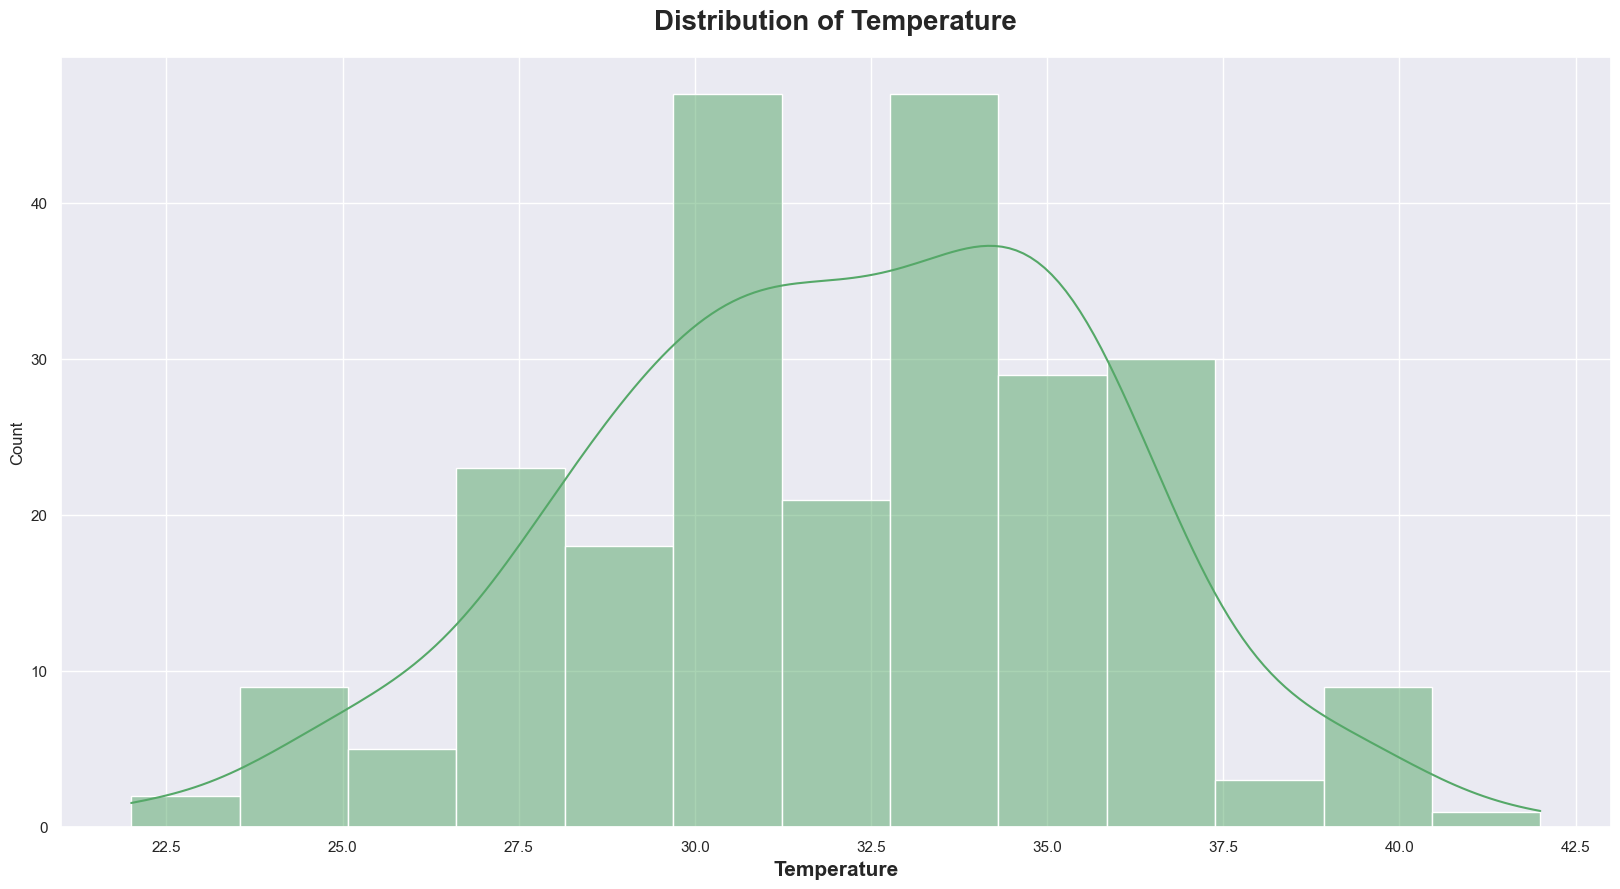

In [37]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature", x=df.Temperature, color='g', kde=True)
plt.title("Distribution of Temperature", weight='bold', fontsize=20, pad=20)
plt.xlabel('Temperature', weight='bold', fontsize=15)

**Observations:**

- Most of the teperatures recorded between the range of 30 to 34.

**Note:**

- As there is only one categorical variable and that too about date so no need for graphical representation.

#### 4.3.2 Bivariate Analysis

- Bivariate analysis is the analysis of two variables to find out relationship between them.
- Here we will use lineplot to see the relationship between `Temperature` and other numerical variables leaving `Classes` and `Region`.

In [40]:
# Creating a dataframe leaving the two columns 'Classes' and 'Region'

df_numeric = df[numerical_features]
df_numeric = df_numeric.iloc[:, :-2]
df_numeric.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


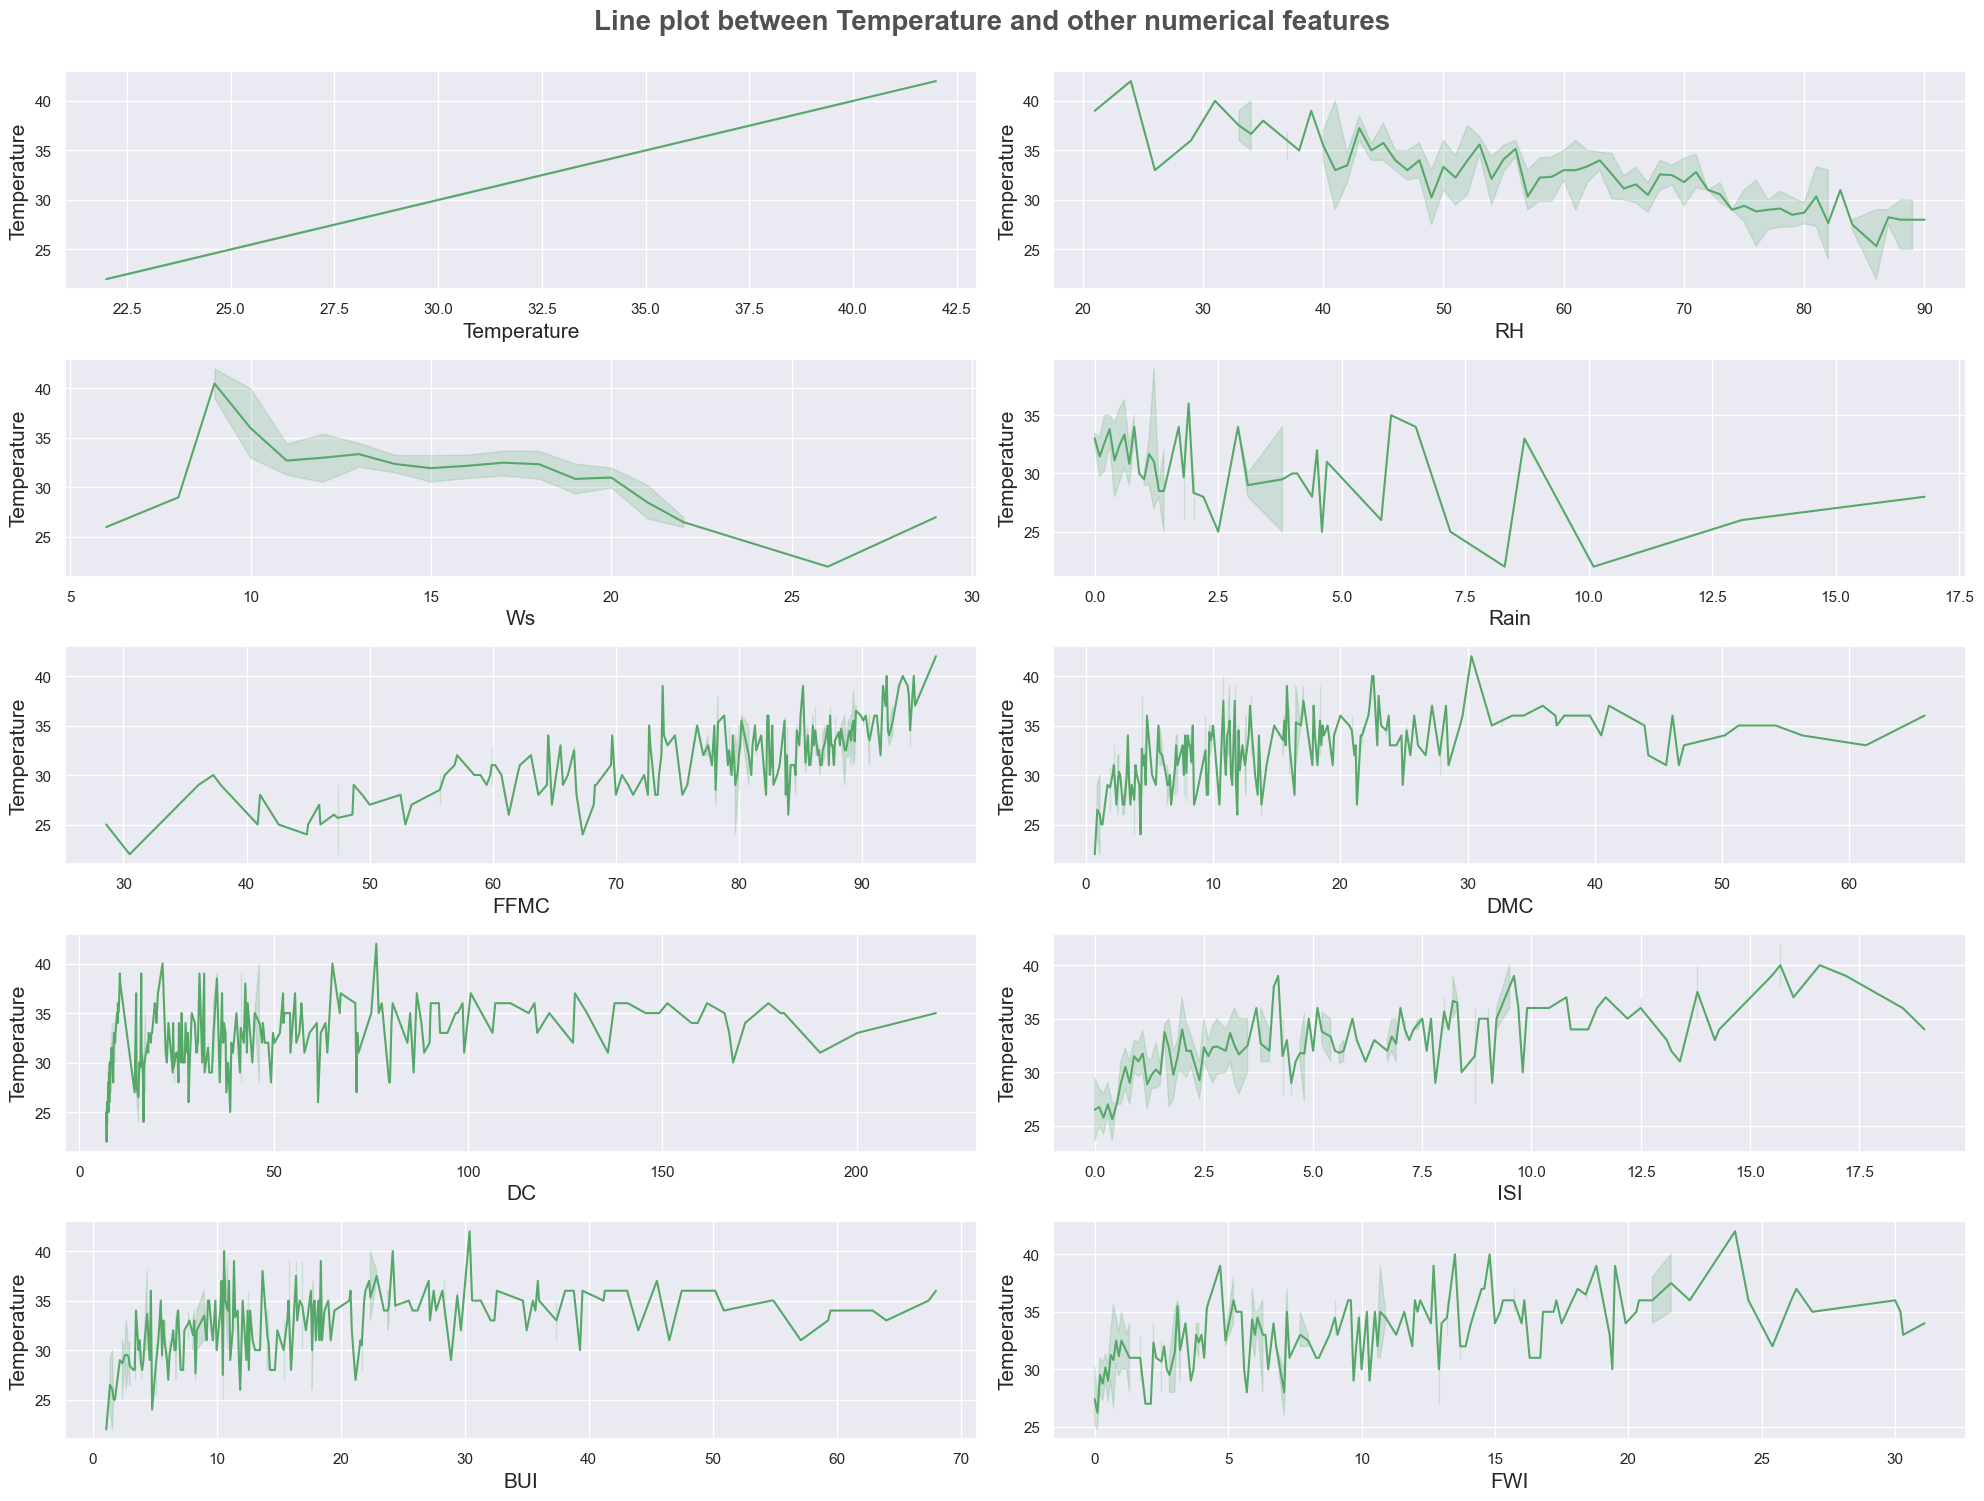

In [51]:
plt.figure(figsize=(20,15))
plt.suptitle('Line plot between Temperature and other numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

column_names = df_numeric.columns

for i in range(0, len(column_names)):
    plt.subplot(5, 2, i+1)
    sns.lineplot(y=df_numeric['Temperature'], x=df[column_names[i]], data=df_numeric, color='g')
    plt.ylabel("Temperature", fontsize=15)
    plt.xlabel(column_names[i], fontsize=15)
    plt.tight_layout()

**Observations:**
- The temperature decreases with increase in Relative humidity (RH).
- The temperature increases with increase in Fine Fuel Moisture Code (FFMC).
- The temperature decreases upto a certain point with increase in Wind speed (WS) then it starts to increase.
- The temperature flactuates with amount of Rain then after a certain point it starts to increase. Same happens with Drought Code (DC).
- After a certain point the temperature starts to decrease with increase in Initial Spread Index (ISI). At start it was flactuating.

#### 4.3.2 Multivariate Analysis

- Multivariate analysis is the analysis of more than one variable.


**Checking Multicollinearity in the numerical features**

In [52]:
df[list(df[numerical_features].columns)].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558393,0.506575,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.569997,-0.420695,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028799,-0.073810,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682,-0.376727,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686033,0.762942,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874778,0.584757,-0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740189,0.512615,0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907461,0.719419,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857771,0.586915,-0.087370
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740189,0.907461,0.857771,1.000000,0.720398,-0.192451


#### Graphical representation

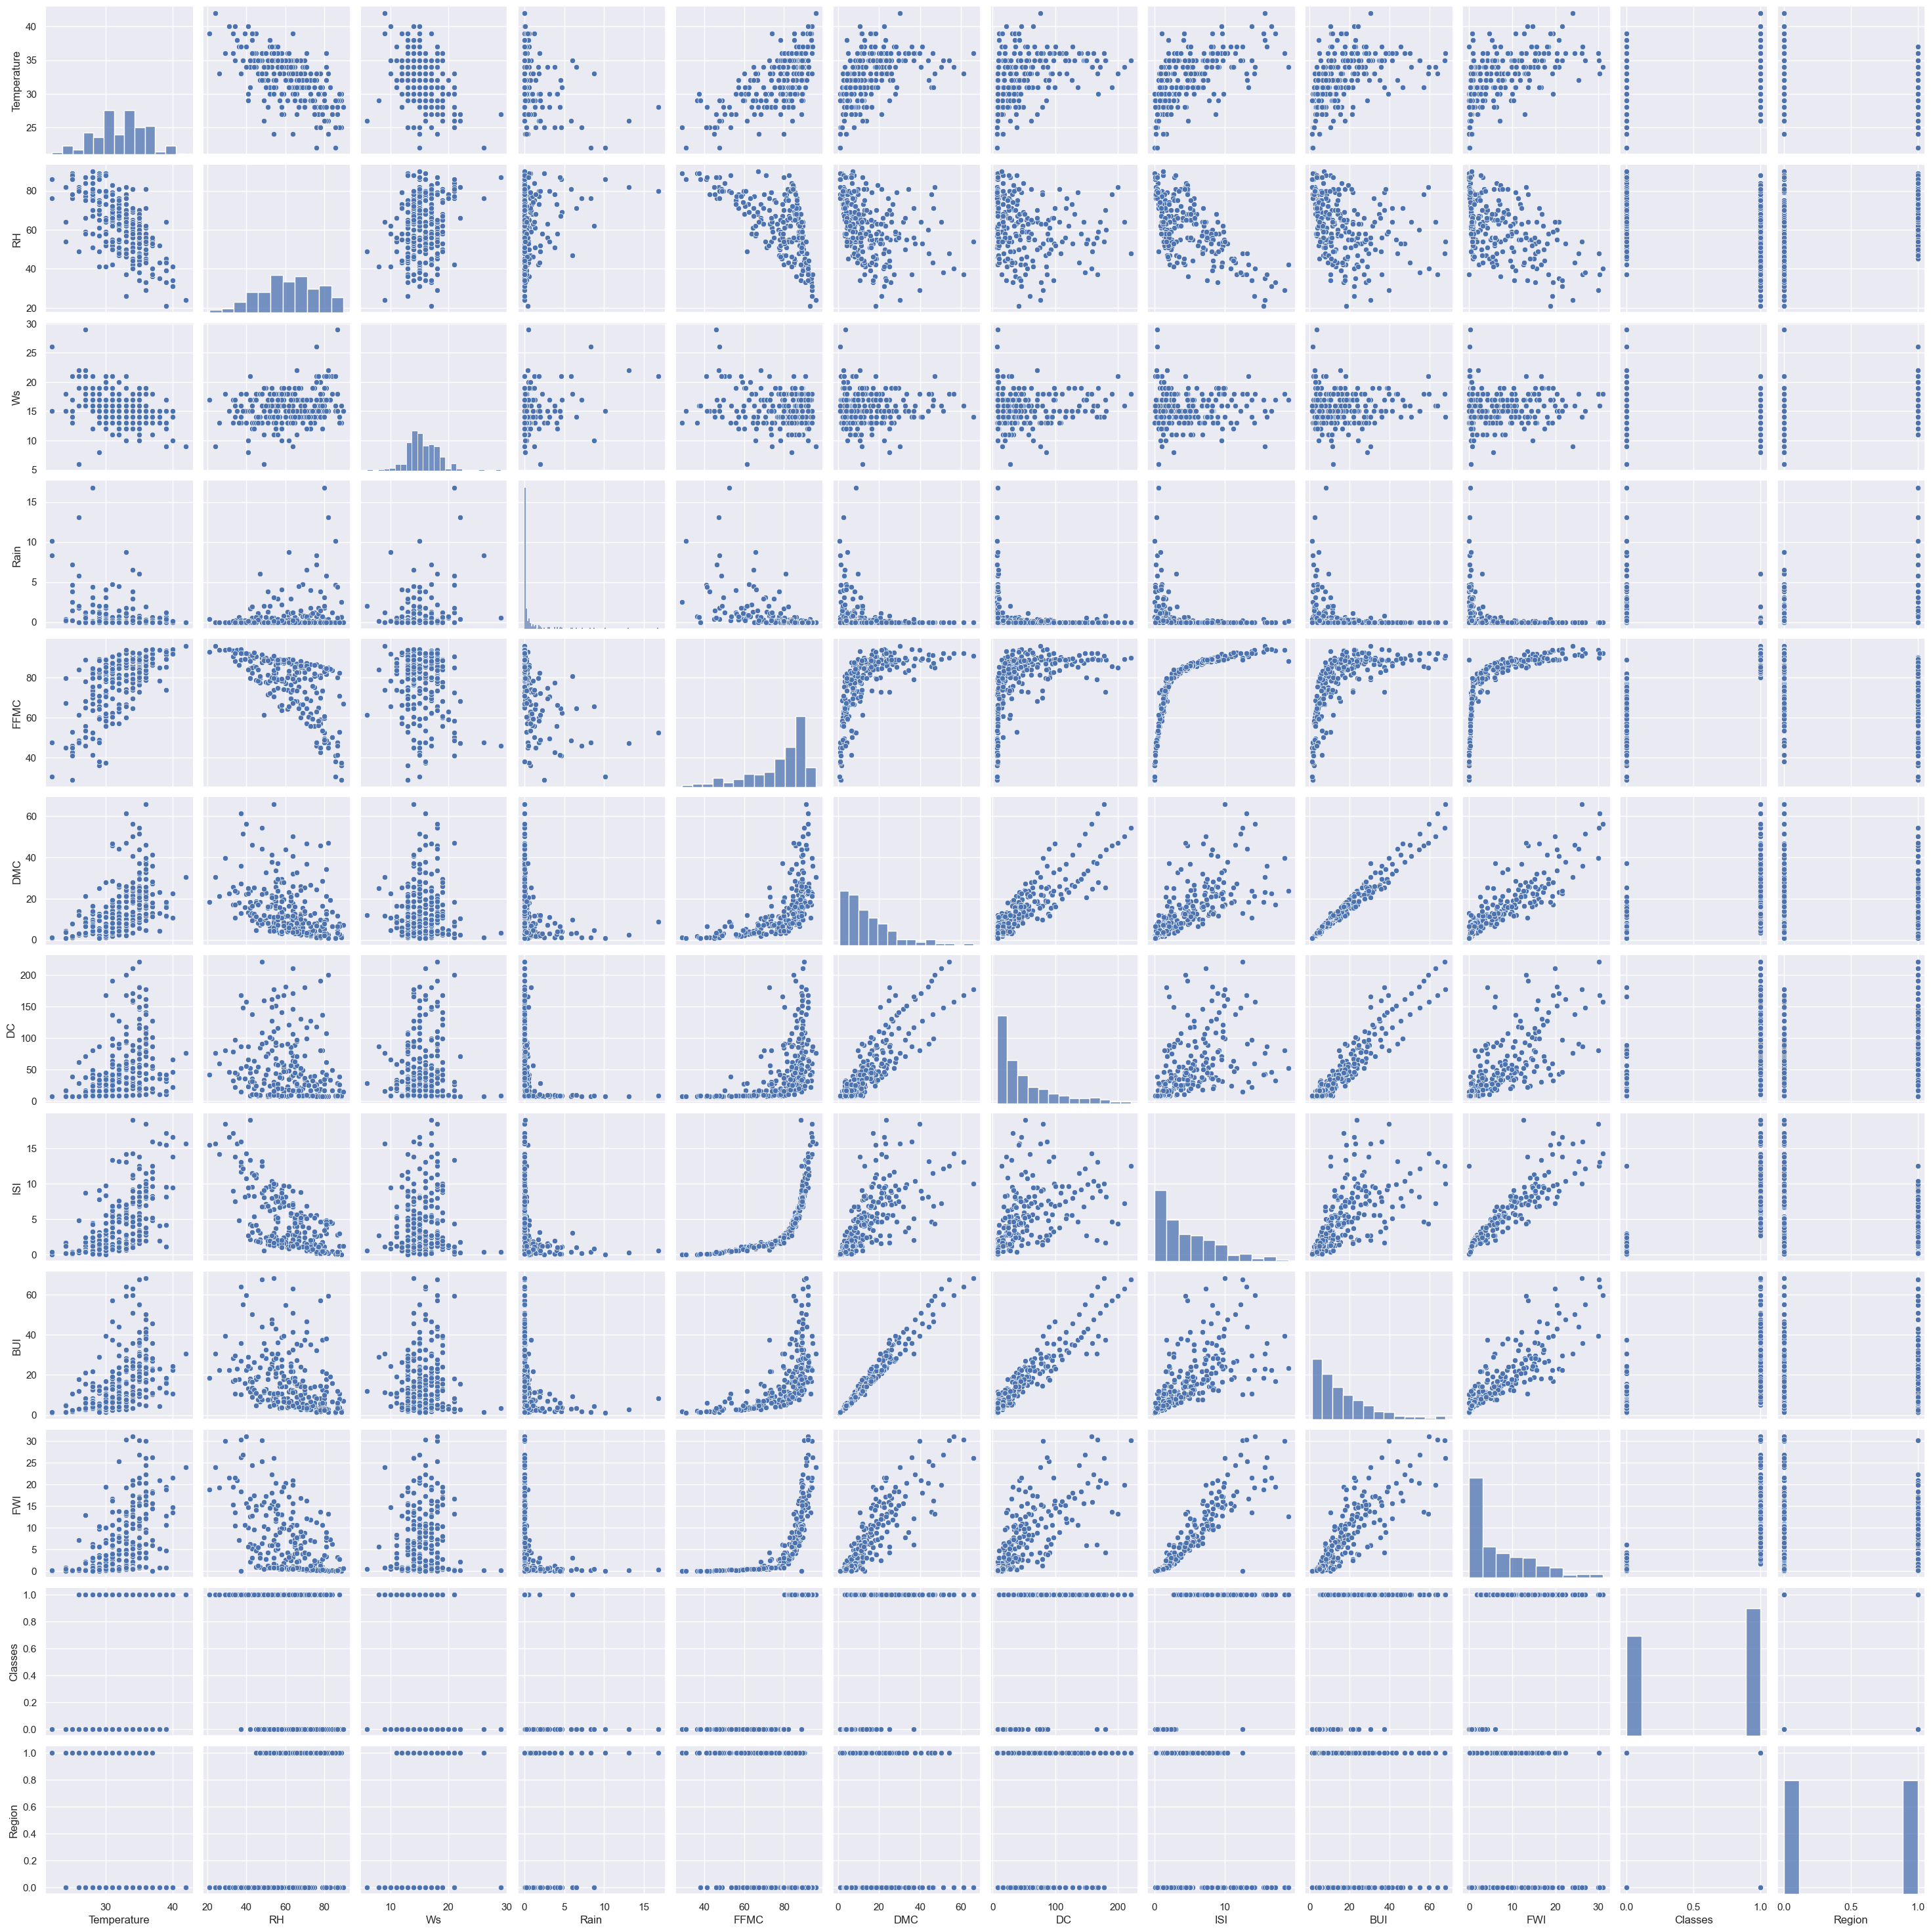

In [53]:
sns.pairplot(df[numerical_features])

<AxesSubplot:>

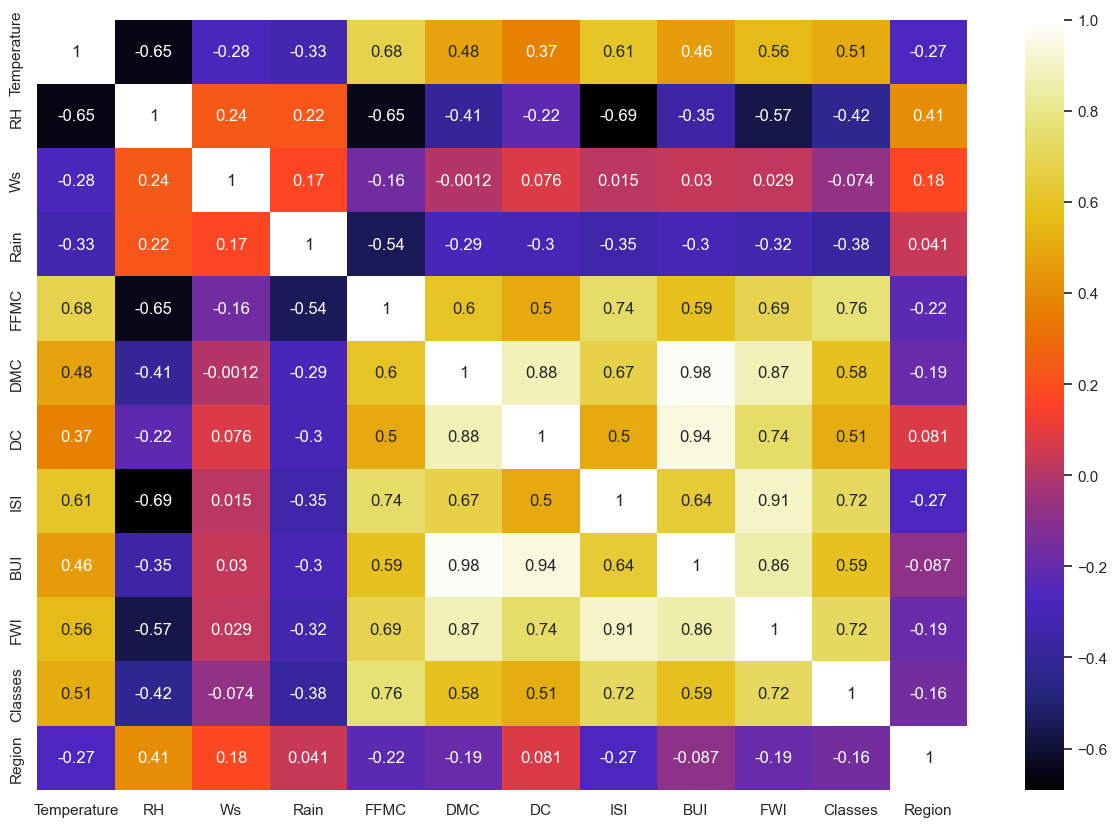

In [54]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df[numerical_features].corr(), cmap='CMRmap', annot=True)

**Observations:**
- `BUI` has high positive correlation with columns `DMC`, `DC` and `FWI`.
- `ISI` is very highly positively correlated with `FWI` and negatively correlated with `RH` and `Rain`.
- `DC` and `DMC` also positively correlated.
- `FWI` and `DMC` also positively correlated.
- `RH` and `FFMC` has negative correlation.

### 5. Data Pre-Processing

In [55]:
# Seeing the original cleaned dataset

df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05


**Number of unique values in each column**

In [56]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
Date           122
dtype: int64

#### 5.1 Separating Different Features

**Numerical features**

In [57]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'Number of Numerical Features is {len(num_features)} and they are: \n{num_features}')

Number of Numerical Features is 12 and they are: 
['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


**Categorical features**

In [58]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'Number of Categorical Features is {len(cat_features)} and they are: \n{cat_features}')

Number of Categorical Features is 1 and they are: 
['Date']


**Discrete features**

In [59]:
dis_features = [feature for feature in num_features if len(df[feature].unique()) <= 10]
print(f'Number of Discrete Features is {len(dis_features)} and they are: \n{dis_features}')

Number of Discrete Features is 2 and they are: 
['Classes', 'Region']


**Continuous features**

In [60]:
con_features = [feature for feature in num_features if feature not in dis_features]
print(f'Number of Continuous Features is {len(con_features)} and they are: \n{con_features}')

Number of Continuous Features is 10 and they are: 
['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


#### 5.2 Outlier handling

**Detecting Outlier and Capping it**

- Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.



- In this cases, we can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [61]:
# Creating a function to detect outliers

def detect_outliers(col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("25percentile: ",percentile25)
    print("75percentile: ",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit: ",upper_limit)
    print("Lower limit: ",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [62]:
# Now applying the function on columns

for col in con_features:
         detect_outliers(col)


 #### Temperature ####
25percentile:  30.0
75percentile:  35.0
Upper limit:  42.5
Lower limit:  22.5

 #### RH ####
25percentile:  52.0
75percentile:  73.25
Upper limit:  105.125
Lower limit:  20.125

 #### Ws ####
25percentile:  14.0
75percentile:  17.0
Upper limit:  21.5
Lower limit:  9.5

 #### Rain ####
25percentile:  0.0
75percentile:  0.5
Upper limit:  1.25
Lower limit:  -0.75

 #### FFMC ####
25percentile:  72.075
75percentile:  88.3
Upper limit:  112.63749999999999
Lower limit:  47.73750000000001

 #### DMC ####
25percentile:  5.8
75percentile:  20.75
Upper limit:  43.175
Lower limit:  -16.624999999999996

 #### DC ####
25percentile:  13.274999999999999
75percentile:  68.15
Upper limit:  150.46250000000003
Lower limit:  -69.03750000000002

 #### ISI ####
25percentile:  1.4
75percentile:  7.3
Upper limit:  16.150000000000002
Lower limit:  -7.450000000000001

 #### BUI ####
25percentile:  6.0
75percentile:  22.525
Upper limit:  47.3125
Lower limit:  -18.787499999999998

 #### FW

**Checking Skewness after Outlier Capping**

In [63]:
df[con_features].skew(axis=0, skipna=True)

Temperature   -0.175783
RH            -0.237964
Ws             0.177613
Rain           1.246290
FFMC          -1.073835
DMC            1.089909
DC             1.159322
ISI            1.021607
BUI            1.021143
FWI            1.057544
dtype: float64

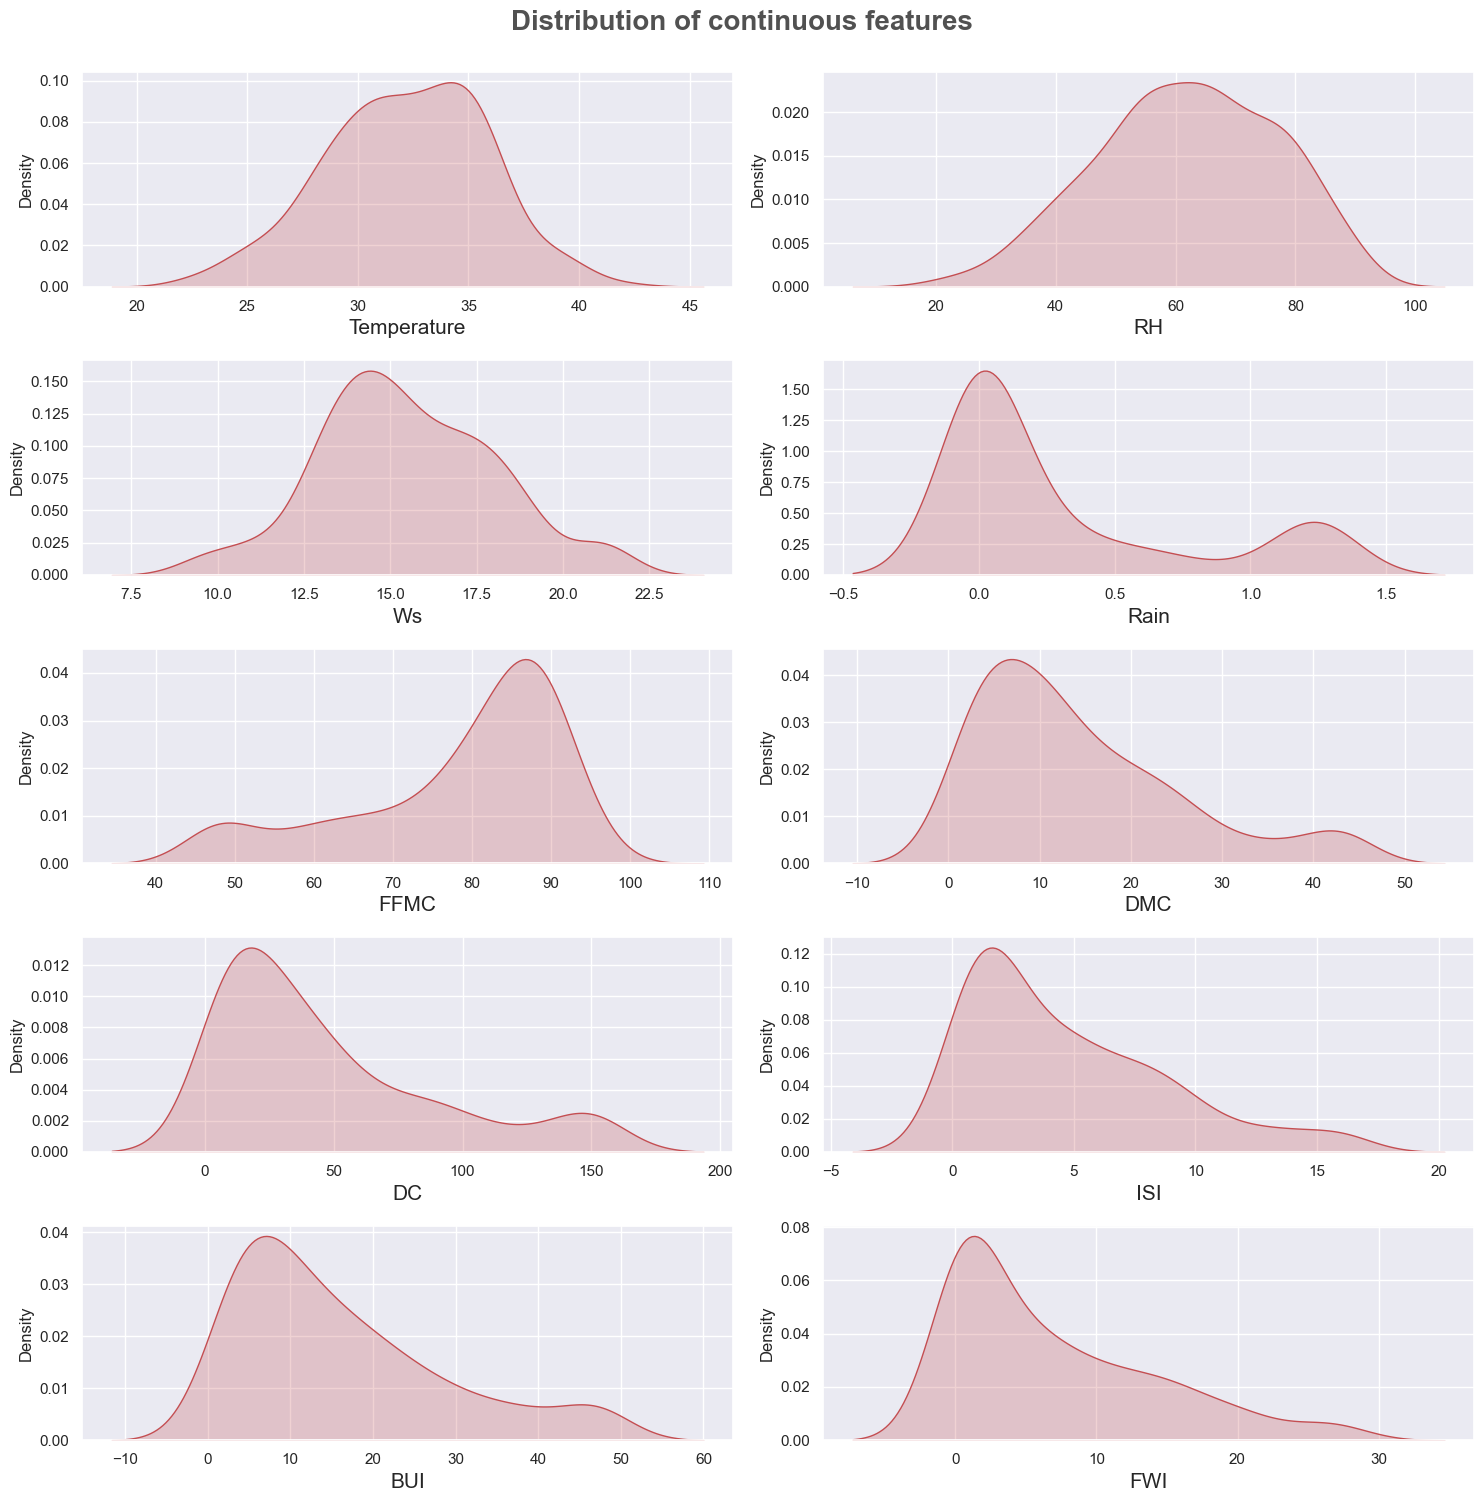

In [65]:
# Again For continuous features

plt.figure(figsize=(15, 15))
plt.suptitle('Distribution of continuous features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(con_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[con_features[i]],shade=True, color='r')
    plt.xlabel(con_features[i], fontsize=15)
    plt.tight_layout()

<AxesSubplot:>

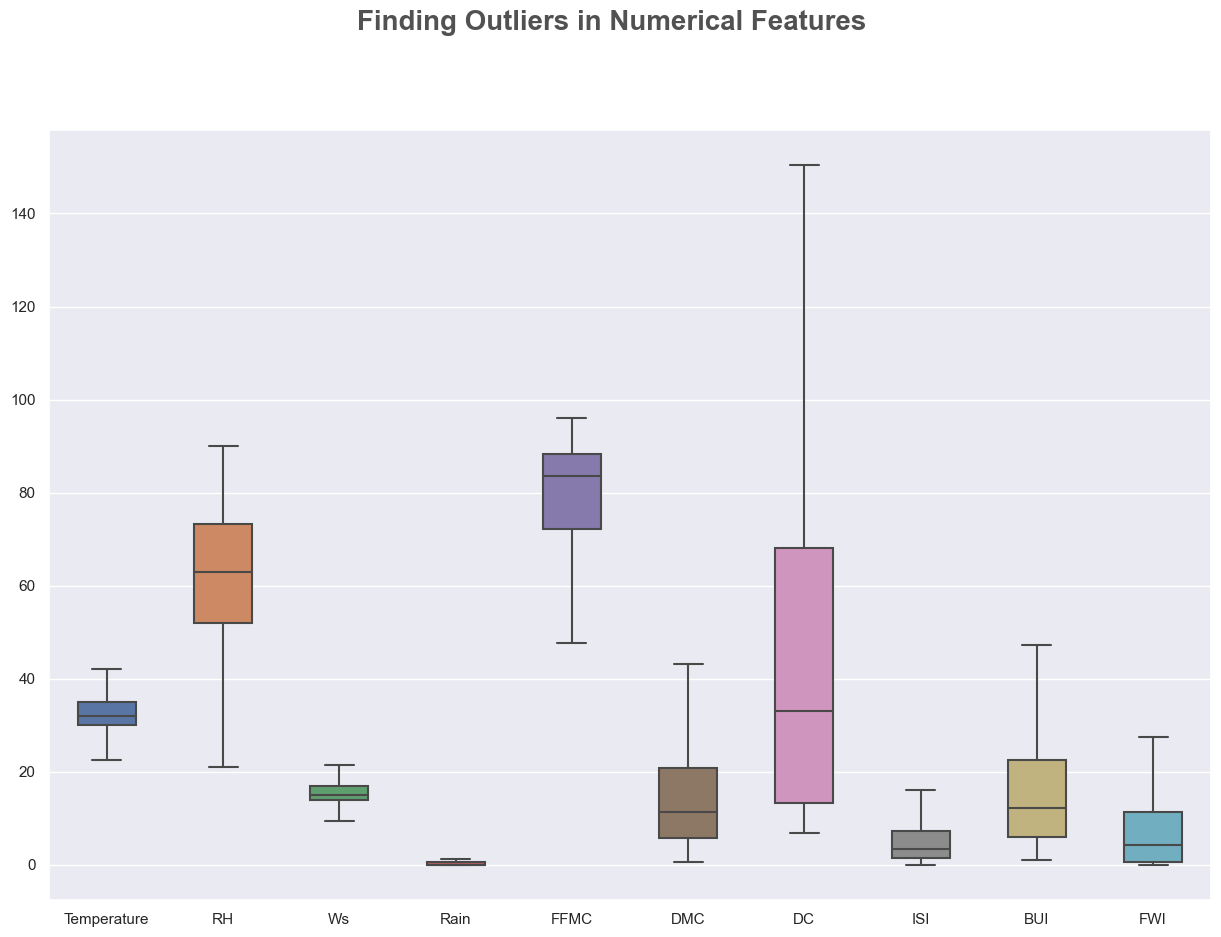

In [66]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('Finding Outliers in Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.boxplot(data=df[con_features], width= 0.5, ax=ax, fliersize=3)

**Observations:**
- Now we can see all the outliers are capped.
- Also the distribution remains almost as same as with the outliers.

**Adding the continuous and discrete features into the final dataset**

In [67]:
df_final = pd.concat([df[con_features], df[dis_features]], axis=1)
df_final.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0,1
1,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0,1
2,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0,1
3,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0,1
4,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0,1


#### 5.3 Creating independent and dependent variables

In [75]:
# Here 'X' is independent features and 'y' is dependent feature.

X = df_final.iloc[:, 1:]
y = df_final.iloc[:,0]

In [76]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0,1
1,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0,1
2,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0,1
3,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0,1
4,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0,1


In [77]:
y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [78]:
# importing library to do test train split

from sklearn.model_selection import train_test_split

In [79]:
# Creating the test and train dataset
# Here 'test_size' is 0.33 means 33%
# Here 'random_state' is 42 so each time we run the code the result would be same

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

**Let's check the shapes of each datasets**

In [80]:
X_train.shape

(163, 11)

In [81]:
y_train.shape

(163,)

In [82]:
X_test.shape

(81, 11)

In [83]:
y_test.shape

(81,)

**Let's see the datasets**

In [84]:
X_train.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,54.0,11.0,0.50,73.7,7.900,30.4000,1.2,9.6000,0.7000,0.0,1
65,65.0,13.0,0.00,86.8,11.100,29.7000,5.2,11.5000,6.1000,1.0,1
134,42.0,21.0,0.00,90.6,18.200,30.5000,13.4,18.0000,16.7000,1.0,0
209,40.0,18.0,0.00,92.1,43.175,150.4625,14.3,47.3125,27.3875,1.0,0
164,56.0,15.0,1.25,74.8,7.100,9.5000,1.6,6.8000,0.8000,0.0,0


In [85]:
y_train.head()

114    32.0
65     34.0
134    31.0
209    34.0
164    34.0
Name: Temperature, dtype: float64

In [86]:
X_test.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1.0,1
6,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1.0,1
155,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1.0,0
213,53.0,17.0,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1.0,0
200,41.0,10.0,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1.0,0


In [87]:
y_test.head()

24     31.0
6      33.0
155    33.0
213    35.0
200    40.0
Name: Temperature, dtype: float64

**Observations:**

- Now we have 163 rows for training and 81 for test datasets.

#### 5.4 Standardizing or feature scaling the dataset (Feature Engineering)

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [89]:
# Now doing fit_transform() the training dataset. Here it will first fit the data and then transform it.
# That is it will compute the μ of the data points and then use σ to create new data points on same scale. 

X_train = scaler.fit_transform(X_train)
X_train

array([[-0.60257784, -1.82006847,  0.33656531, ..., -0.82812286,
        -1.04390785,  0.99388373],
       [ 0.14460201, -1.01389684, -0.70640323, ..., -0.07803797,
         0.95793896,  0.99388373],
       [-1.41768313,  2.2107897 , -0.70640323, ...,  1.39435088,
         0.95793896, -1.0061539 ],
       ...,
       [ 0.89178186,  0.59844643,  1.90101811, ..., -0.91146562,
        -1.04390785,  0.99388373],
       [-0.39880152,  0.19536061, -0.70640323, ...,  0.32478539,
         0.95793896, -1.0061539 ],
       [ 0.9597073 ,  2.2107897 ,  1.90101811, ..., -0.8836847 ,
        -1.04390785,  0.99388373]])

In [90]:
# Here we do the transform() the test data. It will perform standardization by centering and scaling.

X_test = scaler.transform(X_test)
X_test

array([[ 7.66765714e-02, -2.07725206e-01, -7.06403230e-01,
         6.98106296e-01,  1.51079264e-03,  3.83587360e-01,
         2.93741687e-01,  1.77156842e-01,  2.41442627e-01,
         9.57938964e-01,  9.93883735e-01],
       [-6.02577838e-01, -1.01389684e+00, -7.06403230e-01,
         8.08327377e-01, -3.73326220e-01, -3.74243447e-01,
         4.65398161e-01, -3.92522131e-01,  7.47570968e-02,
         9.57938964e-01,  9.93883735e-01],
       [-1.01013048e+00,  1.95360611e-01, -7.06403230e-01,
         7.64238945e-01, -5.47669017e-01, -6.63266007e-01,
         5.63487574e-01, -6.31171430e-01, -3.63665900e-02,
         9.57938964e-01, -1.00615390e+00],
       [-6.70503279e-01,  5.98446428e-01,  3.36565307e-01,
         2.20481608e-01,  5.68124882e-01,  2.32709339e+00,
        -4.41928915e-01,  1.12405568e+00, -1.05818894e-01,
         9.57938964e-01, -1.00615390e+00],
       [-1.48560857e+00, -2.22315429e+00, -4.97809522e-01,
         1.08755412e+00,  7.33750538e-01,  4.13172347e-01,
  

### 6. Model Training

### 6.1 Simple Linear Regression model

In [91]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression

LinearRegression()

#### 6.1.1 Training the model

In [92]:
regression.fit(X_train, y_train)

LinearRegression()

**Printing the coefficient**

In [93]:
print(regression.coef_)

[-0.73817299 -0.48357275  0.67129951  2.39226728  1.36782176  0.79758278
  0.27688161 -1.85766326  0.12602901 -0.32514707  0.05742277]


#### Printing the intercept

In [94]:
print(regression.intercept_)

31.987730061349694


#### 6.1.2 Prediction for the test data

In [95]:
reg_pred = regression.predict(X_test)
reg_pred

array([33.06370081, 34.18627896, 33.66953545, 32.98675299, 36.69985174,
       33.45664154, 35.18228775, 27.34531879, 30.6812043 , 30.20974793,
       28.86168228, 33.0833322 , 33.72544433, 33.15174196, 34.17494863,
       32.22045997, 37.33415353, 26.23993544, 32.58730468, 33.31519884,
       30.97663452, 28.01679329, 35.0517456 , 28.77656317, 36.5572493 ,
       26.92920597, 32.63969905, 33.29825536, 33.4248167 , 34.64403936,
       34.50433665, 31.99293704, 32.70544939, 33.28634695, 32.41073544,
       33.52851834, 30.26049893, 34.01654977, 32.06817667, 24.36759725,
       33.55519102, 33.48815856, 32.52688671, 25.53303772, 36.1733408 ,
       32.59875559, 31.3179629 , 31.26987485, 35.07536278, 34.4873544 ,
       36.78817794, 30.84347817, 31.06652713, 34.64807141, 33.86436628,
       32.52243011, 36.72829967, 31.84469026, 30.40908703, 36.28670097,
       33.11489793, 29.9386535 , 34.03204881, 32.00697098, 31.67368275,
       25.61563035, 33.16066526, 30.8303706 , 36.79559519, 35.43

### 6.2 Ridge Regression model

In [99]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

#### 6.2.1 Training the model

In [100]:
ridge.fit(X_train, y_train)

Ridge()

**Printing the coefficient**

In [101]:
print(ridge.coef_)

[-0.79486244 -0.48580044  0.60384955  2.25491266  0.70792101  0.45714856
  0.30245189 -0.80895085  0.0470057  -0.30606154  0.04787086]


**Printing the intercept**

In [102]:
print(ridge.intercept_)

31.987730061349694


#### 6.2.2 Prediction for the test data

In [103]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([33.06299963, 34.13621959, 33.63950325, 33.00708305, 36.6803758 ,
       33.41667013, 35.15916138, 27.38789324, 30.7239846 , 30.1472425 ,
       28.87351895, 33.20700385, 33.69237923, 33.19536392, 34.29715828,
       32.16308518, 37.24325834, 26.3124305 , 32.4919839 , 33.2839515 ,
       30.88931953, 28.02822622, 35.02554617, 28.7648236 , 36.569789  ,
       26.95184638, 32.64788315, 33.3312095 , 33.38635294, 34.56546585,
       34.51606178, 31.94271315, 32.68051994, 33.4016699 , 32.39569905,
       33.51430622, 30.1644501 , 34.08572268, 32.01640168, 24.47872947,
       33.59846986, 33.50431205, 32.5291528 , 25.60143352, 36.10661237,
       32.53723138, 31.27127713, 31.21715899, 35.07731038, 34.49103816,
       36.69621859, 30.77835934, 31.04936127, 34.66752322, 33.84409684,
       32.41386041, 36.78349374, 31.85705488, 30.37465945, 36.34020861,
       33.04316264, 29.91959998, 33.96485127, 31.95387788, 31.70178279,
       25.60722886, 33.14729069, 30.76167673, 36.72280263, 35.41

### 6.3 Lasso Regression model

In [104]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso

Lasso()

#### 6.3.1 Training the model

In [105]:
lasso.fit(X_train, y_train)

Lasso()

**Printing the coefficient**

In [106]:
print(lasso.coef_)

[-0.62775073 -0.         -0.          1.23221554  0.          0.
  0.          0.          0.          0.         -0.        ]


**Printing the intercept**

In [107]:
print(lasso.intercept_)

31.987730061349694


#### 6.3.2 Prediction for the test data

In [108]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([32.79981371, 33.36203229, 33.56354731, 32.68031985, 34.26042301,
       31.631795  , 34.10123447, 28.67689451, 30.93786487, 29.98946999,
       31.01145915, 32.40373776, 32.80065896, 32.29508486, 33.40088173,
       32.48059138, 34.63923539, 28.20598362, 32.30360779, 33.13830388,
       31.60525931, 29.68193387, 33.68388642, 30.20267122, 34.67924384,
       28.58974582, 32.55797648, 32.86961718, 32.99048777, 33.9540459 ,
       33.28317442, 31.19044701, 32.80886812, 32.84508576, 32.56787613,
       32.69169229, 31.38648072, 33.31381469, 30.96555957, 28.29126411,
       32.79423635, 32.95458391, 32.59093478, 28.20598362, 34.29400885,
       32.56850367, 31.88478696, 30.8093166 , 34.22389161, 33.53522507,
       34.44909281, 31.79656091, 31.79045206, 32.9990107 , 33.49521663,
       32.1213606 , 34.94413972, 32.59240756, 30.9731412 , 34.47478325,
       33.1733625 , 31.09116228, 33.34013266, 32.23233153, 32.10115146,
       28.33390435, 33.0763958 , 31.68443096, 34.39739816, 34.15

### 6.4 ElasticNet Regression model

In [109]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic

ElasticNet()

#### 6.4.1 Training the model

In [110]:
elastic.fit(X_train, y_train)

ElasticNet()

**Printing the coefficient**

In [111]:
print(elastic.coef_)

[-0.69537798 -0.10593637 -0.          0.81909116  0.14073666  0.
  0.22627668  0.04484606  0.13919408  0.05340521 -0.        ]


**Printing the intercept**

In [112]:
print(elastic.intercept_)

31.987730061349694


#### 6.4.2 Prediction for the test data

In [113]:
elastic_pred = elastic.predict(X_test)
elastic_pred

array([32.68761983, 33.27298145, 33.36365648, 32.6379774 , 34.76451911,
       31.5805353 , 34.21914232, 28.91901237, 30.72127885, 30.03555877,
       30.35407868, 32.3037364 , 32.49149551, 32.13351757, 33.91653385,
       32.23335956, 35.70766367, 28.45258368, 32.10513619, 32.91156715,
       30.97951418, 29.56413604, 33.69879535, 30.00131768, 35.40514104,
       28.78564781, 32.37272075, 32.87875718, 32.67400158, 34.1806027 ,
       33.36248055, 31.1620342 , 32.71911747, 33.13069877, 32.07705096,
       32.38444168, 30.76286662, 33.31210321, 31.02592752, 28.23637706,
       32.81769139, 32.80123094, 32.18131651, 28.31504697, 34.75692594,
       32.39003109, 31.69745211, 30.70127806, 34.32907808, 33.62144886,
       35.48462934, 31.30171296, 31.56250672, 33.71034604, 33.61377572,
       32.34669296, 35.97782458, 31.96577533, 30.76252086, 34.96694781,
       33.05592649, 30.72340588, 33.52349211, 31.90540321, 31.70731425,
       28.25193426, 32.98208546, 31.31657768, 35.414713  , 34.03

### 6.5 Assumptions Of the Regression models


- To check whether the Linear model is good or bad.
- 1st to do create a scatter plot between the real test data and predicted test data of the model.
- 2nd get the residuals or errors and then create a distribution plot of those residuals.
- 3rd create an Uniform distribution by using a scatter plot between the predictions and the residuals.

**Scatter plots**

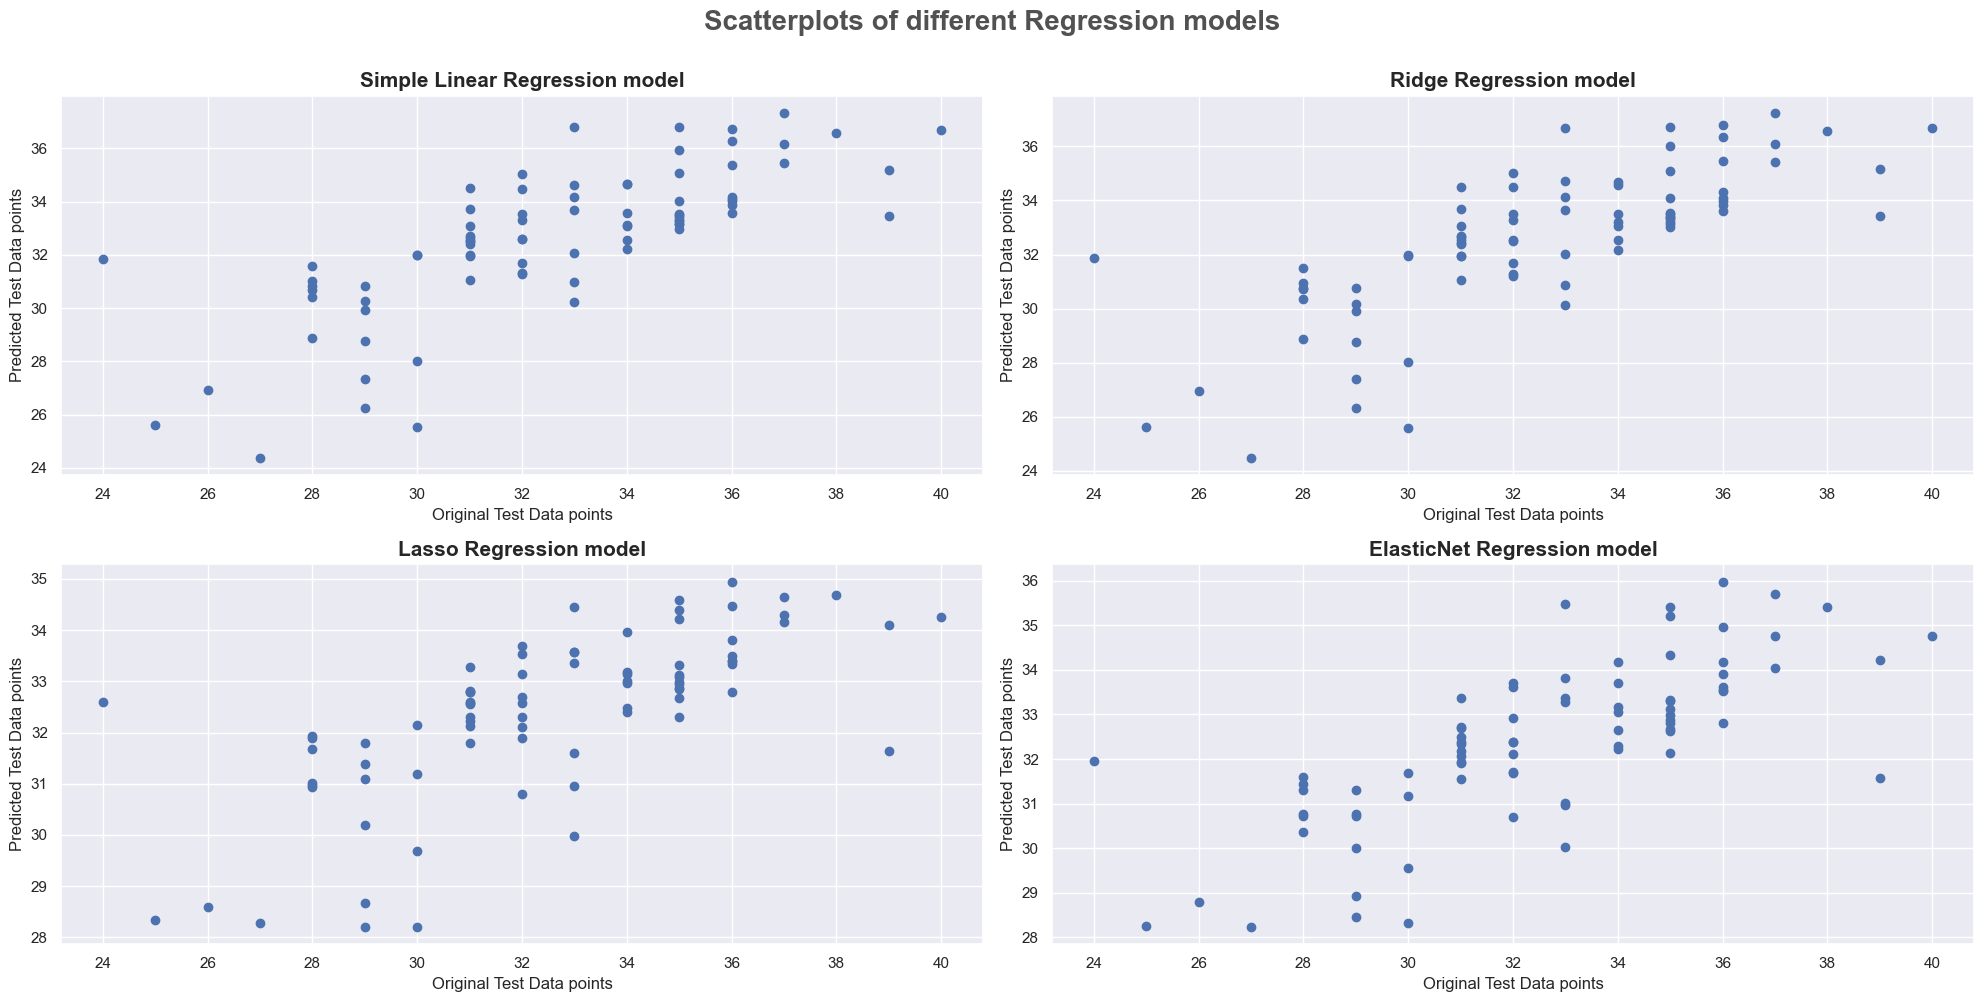

In [116]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle('Scatterplots of different Regression models', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

plt.subplot(2, 2, 1)
plt.scatter(y_test, reg_pred)
plt.title("Simple Linear Regression model", fontsize=15, fontweight='bold')
plt.xlabel("Original Test Data points")
plt.ylabel("Predicted Test Data points")

plt.subplot(2, 2, 2)
plt.scatter(y_test, ridge_pred)
plt.title("Ridge Regression model", fontsize=15, fontweight='bold')
plt.xlabel("Original Test Data points")
plt.ylabel("Predicted Test Data points")

plt.subplot(2, 2, 3)
plt.scatter(y_test, lasso_pred)
plt.title("Lasso Regression model", fontsize=15, fontweight='bold')
plt.xlabel("Original Test Data points")
plt.ylabel("Predicted Test Data points")

plt.subplot(2, 2, 4)
plt.scatter(y_test, elastic_pred)
plt.title("ElasticNet Regression model", fontsize=15, fontweight='bold')
plt.xlabel("Original Test Data points")
plt.ylabel("Predicted Test Data points")


plt.tight_layout()
plt.show()

**Observations:**

- Here we see not much difference in all the models.

In [117]:
# Calculating the residuals, i.e. the errors for different models

simple_residuals = y_test - reg_pred
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred
elastic_residuals = y_test - elastic_pred

**Distribution plots of residuals**

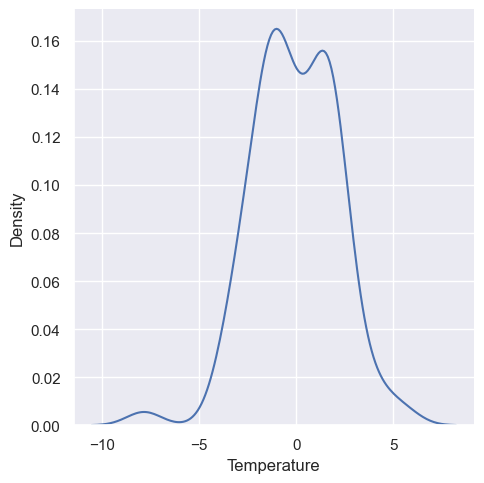

In [119]:
sns.displot(simple_residuals, kind="kde")

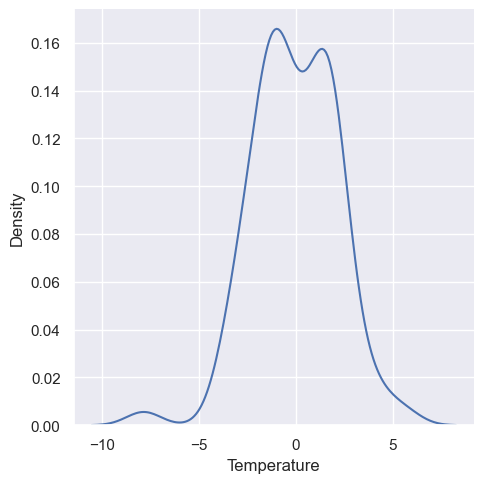

In [120]:
sns.displot(ridge_residuals, kind="kde")

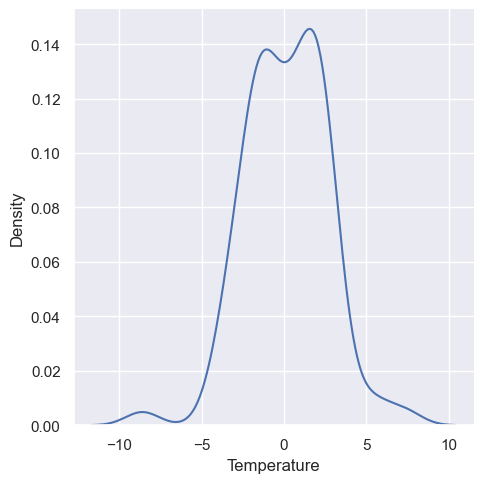

In [121]:
sns.displot(lasso_residuals, kind="kde")

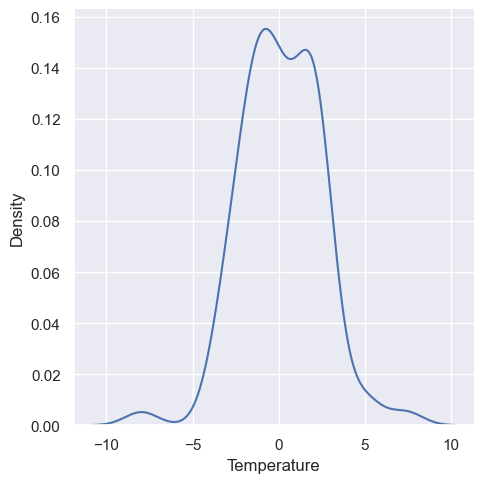

In [122]:
sns.displot(elastic_residuals, kind="kde")

**Observations:**
- All the plots are slightly left skewed.

**Scatter plot for uniform distribution**

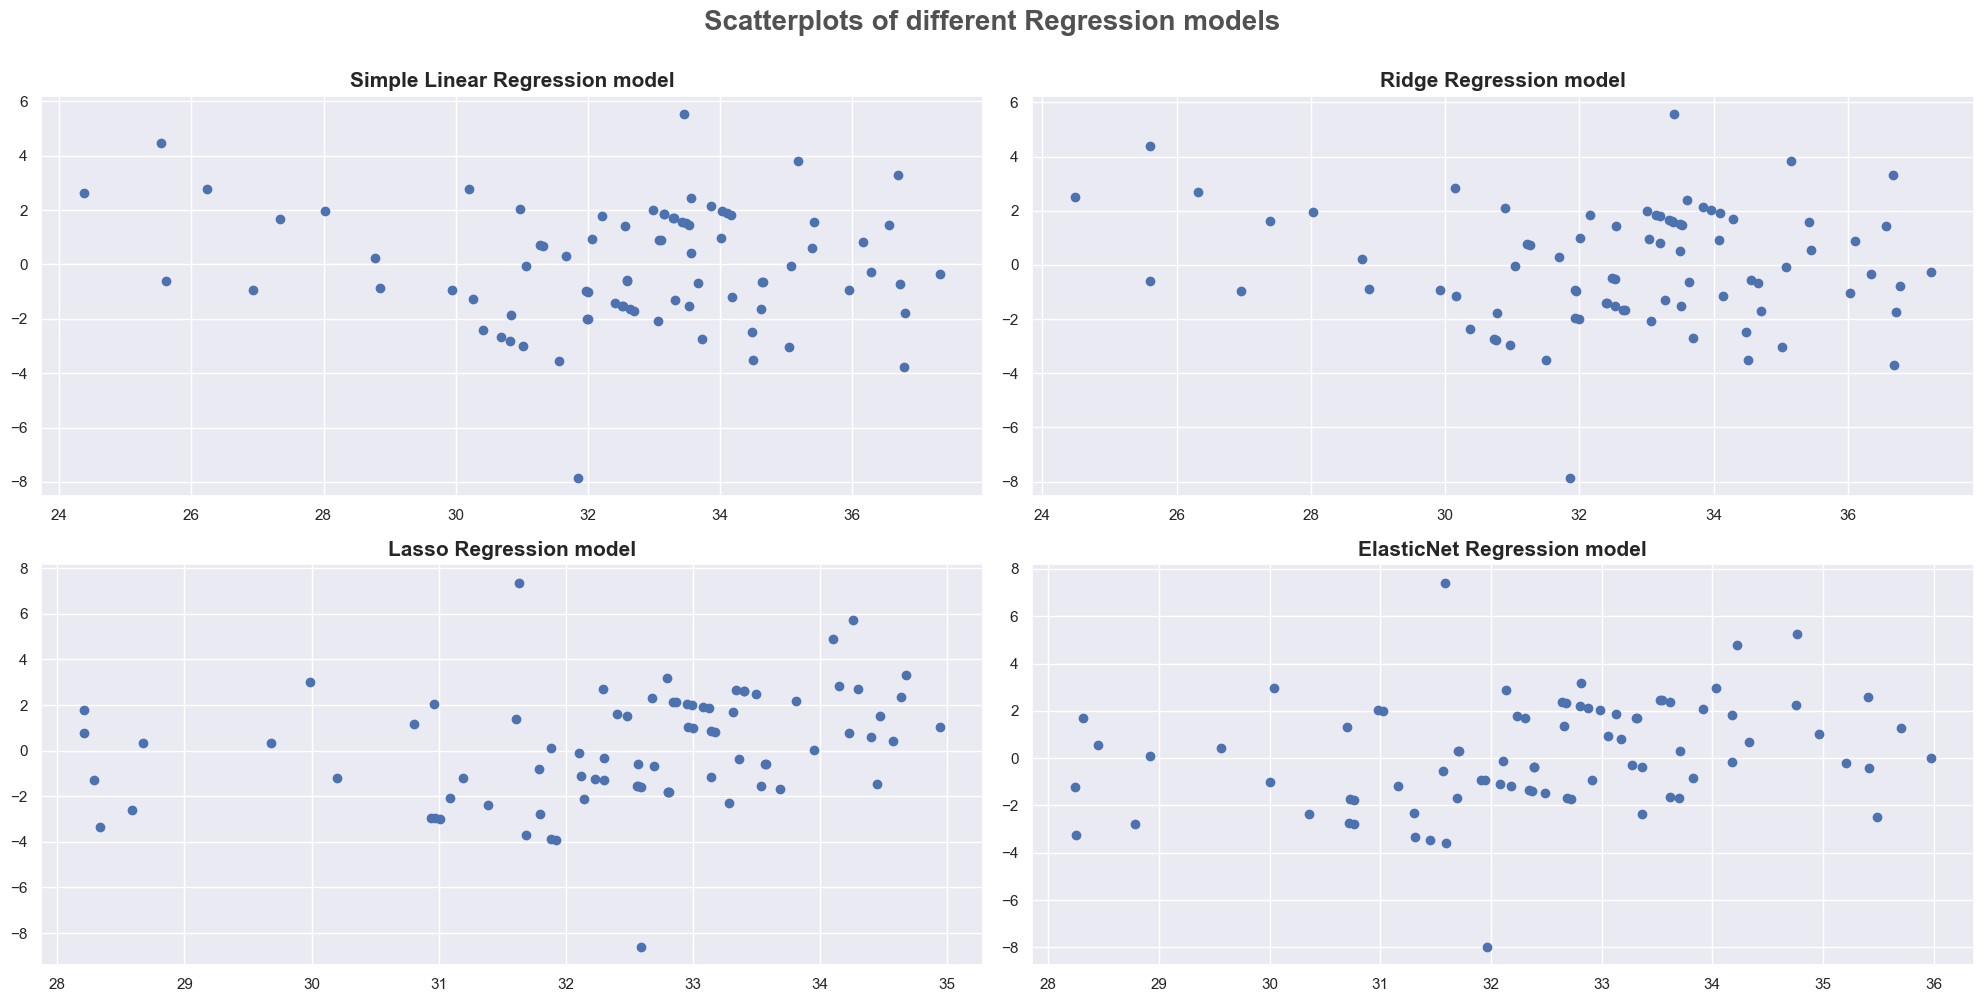

In [124]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle('Scatterplots of different Regression models', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

plt.subplot(2, 2, 1)
plt.scatter(reg_pred, simple_residuals)
plt.title("Simple Linear Regression model", fontsize=15, fontweight='bold')


plt.subplot(2, 2, 2)
plt.scatter(ridge_pred, ridge_residuals)
plt.title("Ridge Regression model", fontsize=15, fontweight='bold')


plt.subplot(2, 2, 3)
plt.scatter(lasso_pred, lasso_residuals)
plt.title("Lasso Regression model", fontsize=15, fontweight='bold')


plt.subplot(2, 2, 4)
plt.scatter(elastic_pred, elastic_residuals)
plt.title("ElasticNet Regression model", fontsize=15, fontweight='bold')



plt.tight_layout()
plt.show()

**Observations:**
- All the models are showing a negative correlation.

### 7. Choosing the best model

#### 7.1 Performance metrics

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [126]:
# Creting function for all regression models for their errors

def errors(mla, pred_data):
    print(f"For the {mla} algorithm:")
    print("The Mean Squared Error is: ", mean_squared_error(y_test, pred_data))
    print("The Mean Absolute Error is: ", mean_absolute_error(y_test, pred_data))
    print("The Root Mean Squared Error is: ", np.sqrt(mean_squared_error(y_test, pred_data)))
    print("\n")
    
  
errors("Simple Linear Regression", reg_pred)
errors("Ridge Regression", ridge_pred)
errors("Lasso Regression", lasso_pred)
errors("ElasticNet Regression", elastic_pred)

For the Simple Linear Regression algorithm:
The Mean Squared Error is:  4.6041665086958705
The Mean Absolute Error is:  1.7519691712082832
The Root Mean Squared Error is:  2.145732161453491


For the Ridge Regression algorithm:
The Mean Squared Error is:  4.55373665402209
The Mean Absolute Error is:  1.7380920201509793
The Root Mean Squared Error is:  2.133948606227922


For the Lasso Regression algorithm:
The Mean Squared Error is:  5.999248918641266
The Mean Absolute Error is:  1.974742788359419
The Root Mean Squared Error is:  2.4493364241445614


For the ElasticNet Regression algorithm:
The Mean Squared Error is:  5.3088550720656915
The Mean Absolute Error is:  1.825156200520228
The Root Mean Squared Error is:  2.304095282766251




#### 7.2 R Squared and Adjusted R Square

In [127]:
from sklearn.metrics import r2_score

In [129]:
# Creting function for all regreesion models for their r values

def r_value(mla, pred_data):
    print(f"For the {mla} algorithm:")
    score = r2_score(y_test, pred_data)
    print(f"The R Square value of {mla} is: {score}")
    adj = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print(f"The Adjusted R Square value of {mla} is: {adj}")
    print("\n")
    

r_value("Simple Linear Regression", reg_pred)
r_value("Ridge Regression", ridge_pred)
r_value("Lasso Regression", lasso_pred)
r_value("ElasticNet Regression", elastic_pred)

For the Simple Linear Regression algorithm:
The R Square value of Simple Linear Regression is: 0.5713362216041777
The Adjusted R Square value of Simple Linear Regression is: 0.5029985178019452


For the Ridge Regression algorithm:
The R Square value of Ridge Regression is: 0.5760314149703573
The Adjusted R Square value of Ridge Regression is: 0.5084422202554866


For the Lasso Regression algorithm:
The R Square value of Lasso Regression is: 0.44144923860926155
The Adjusted R Square value of Lasso Regression is: 0.35240491432957866


For the ElasticNet Regression algorithm:
The R Square value of ElasticNet Regression is: 0.505727286393884
The Adjusted R Square value of ElasticNet Regression is: 0.42693018712334374




### Conclusion:

- From the above results we can say that either Simple Linear or Ridge Regression is the best model for this dataset.